In [0]:
cd /content/drive/My Drive/Colab Notebooks/Projects/Movie Reviews Classification

/content/drive/My Drive/Colab Notebooks/Projects/Movie Reviews Classification


In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import re
from tensorflow.keras.regularizers import l2
import io
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_data = pd.read_csv("IMDB Dataset.csv")
train_data.head(6)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [0]:
train_data['review'].tail(15)

49985    Imaginary Heroes is clearly the best film of t...
49986    This movie is a disgrace to the Major League F...
49987    A remake of Alejandro Amenabar's Abre los Ojos...
49988    When I first tuned in on this morning news, I ...
49989    I got this one a few weeks ago and love it! It...
49990    Lame, lame, lame!!! A 90-minute cringe-fest th...
49991    Les Visiteurs, the first movie about the medie...
49992    John Garfield plays a Marine who is blinded by...
49993    Robert Colomb has two full-time jobs. He's kno...
49994    This is your typical junk comedy.<br /><br />T...
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

# **Data Processing**

In [0]:
X = train_data['review']
y = np.array(pd.get_dummies(train_data['sentiment'],drop_first=True))
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 11)

In [0]:
train_sentences = list(X_train)
val_sentences = list(X_val)

train_labels,val_labels = np.array(y_train),np.array(y_val)

In [0]:
train_labels

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=uint8)

In [0]:
len(train_sentences),len(val_sentences)

(40000, 10000)

In [0]:
id = 5
print(train_sentences[id])
train_labels[id]

Princess Victoria (Emily Blunt) is in line for the throne of England. The present King William (Jim Broadbent) is not well and may not live long. However, Vicky's scheming mother, The Duchess of Kent (Miranda Richandson) and her aide, John (Mark Strong) want to force Victoria to sign papers declaring them to be the "regents" until she is older, since she is only 20 years of age. The young lady refuses, despite John slapping her around. It is another sign that Victoria has a strong will and deep love for her country. Yet, when William does pass away, shortly after her 21st birthday, Victoria knows she has a heavy duty before her. First, she must surround herself with the "right" advisers to govern wisely. She chooses handsome Lord Melbourne (Paul Bettany) who, although an older man, is mentioned as a suitor for Vicky. Which brings us to the young queen's second major decision. Sooner than not, the young queen should select her future mate, as it will bring stability to her life and to t

array([1], dtype=uint8)

# Data Preprocessing Part

In [0]:
def clean_text(text): 
    
    #emoji = re.compile("["
     #                      u"\U0001F600-\U0001FFFF"  # emoticons
     #                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      #                     u"\U0001F680-\U0001F6FF"  # transport & map symbols
       #                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        #                   u"\U00002702-\U000027B0"
         #                  u"\U000024C2-\U0001F251"
          #                 "]+", flags=re.UNICODE)    
    #text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"books", "movies", text)
    text = re.sub(r"book", "movie", text)
    text = re.sub(r"read", "watch", text)
    text = re.sub(r"pages", "plots", text)
    text = re.sub(r"author", "story writer", text)
    text = re.sub(r"written", "directed", text)
    text = re.sub(r"ordered", "booked ticket", text)    
    text = re.sub(r"reading", "watching", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [0]:
def CleanTokenize(l):
    cleaned_sentences = []   
    for line in l:
        line = clean_text(str(line))               
        cleaned_sentences.append(line)
    return cleaned_sentences


train_sentences = CleanTokenize(train_sentences)
val_sentences = CleanTokenize(val_sentences)

In [0]:
train_sentences[:20]

['painful painful is the only word to describe this awful rendition of such a fun and interesting shakespearean play i gave it a shot but was terribly disappointed and could not bare to even finish viewing it to the person who wrote a novel about how wonderful this twist of much ado was i pity you and your bored brain may your pretenses about young viewers be lifted without retribution please do not even bother with this gut wrenching disgusting excuse for a performance of an acclaimed shakespeare drama you will be forced to induce vomiting and will require a commode close to the television with which you choose to watch this crap because involuntary defecation will take place',
 'this is a cute little french silent comedy about a man who bets another that he can not stay in this castle for one hour due to its being haunted and once the guy enters the house it looks much more like a crazed fun house or maybe like the aftereffects of lsd while there are ghosts and skeletons there is a w

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 300
max_len = 150
trunc_type = 'post'
oov_tok = "<oov>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_len,padding = 'post',truncating=trunc_type)


val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences,maxlen=max_len,padding='post',truncating=trunc_type)

In [0]:
import gensim
WORD2VEC_MODEL = "GoogleNews-vectors-negative300.bin.gz"
#load word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True, limit=100000)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
embedding_weights = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index] = word2vec[word]
    except:
        pass 

In [0]:
model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len, weights = [embedding_weights], trainable = False),
                               tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.5)),
                               tf.keras.layers.LSTM(64, return_sequences=False, dropout=0.5),                               
                               tf.keras.layers.Dense(128,activation='relu'),
                               tf.keras.layers.Dense(64,activation='relu'),                                                                                                        
                               tf.keras.layers.Dense(1, activation='sigmoid')                               
])

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 300)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 256)          439296    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 3,538,113
Trainable params: 538,113
Non-trainable params: 3,000,000
______________________________________

Epoch 1/30
625/625 [==============================] - 26s 42ms/step - loss: 0.6251 - accuracy: 0.6385 - val_loss: 0.6822 - val_accuracy: 0.5578
Epoch 2/30
625/625 [==============================] - 26s 41ms/step - loss: 0.6064 - accuracy: 0.6662 - val_loss: 0.4475 - val_accuracy: 0.8029
Epoch 3/30
625/625 [==============================] - 26s 41ms/step - loss: 0.4695 - accuracy: 0.7801 - val_loss: 0.4228 - val_accuracy: 0.8200
Epoch 4/30
625/625 [==============================] - 26s 41ms/step - loss: 0.4031 - accuracy: 0.8167 - val_loss: 0.3578 - val_accuracy: 0.8378
Epoch 5/30
625/625 [==============================] - 26s 41ms/step - loss: 0.3673 - accuracy: 0.8336 - val_loss: 0.3461 - val_accuracy: 0.8472
Epoch 6/30
625/625 [==============================] - 26s 41ms/step - loss: 0.3517 - accuracy: 0.8416 - val_loss: 0.3819 - val_accuracy: 0.8235
Epoch 7/30
625/625 [==============================] - 26s 41ms/step - loss: 0.3415 - accuracy: 0.8451 - val_loss: 0.3270 - val_accuracy:

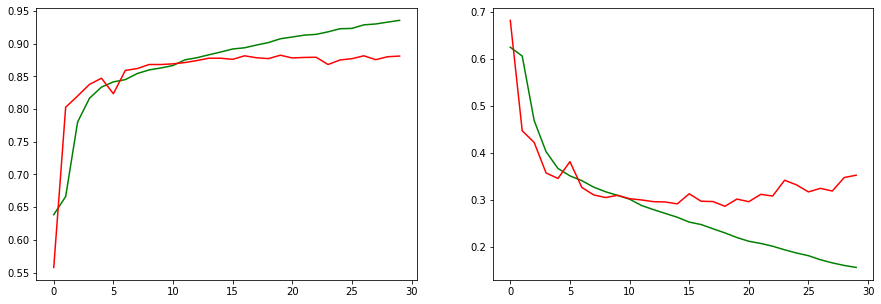

In [0]:
epochs = 30
h_1 = model.fit(padded,train_labels,epochs = epochs, batch_size= 64, validation_data=(val_padded,val_labels), validation_batch_size=16) 

f,a = plt.subplots(1,2,figsize = (15,5))
a[0].plot(range(epochs),h_1.history['accuracy'], 'g')
a[0].plot(range(epochs),h_1.history['val_accuracy'], 'r')


a[1].plot(range(epochs),h_1.history['loss'], 'g')
a[1].plot(range(epochs),h_1.history['val_loss'], 'r')        

In [0]:
model.save('sentiment_version_2.h5')

In [0]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer_version_2.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [0]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import re
from tensorflow.keras.models import  load_model
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences


with open('tokenizer_version_2.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

senti_model = load_model("sentiment_version_2.h5")
max_len = 150
trunc_type = 'post'
padding = 'post'

def clean_text(text):  
    
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"books", "movies", text)
    text = re.sub(r"book", "movie", text)
    text = re.sub(r"read", "watch", text)
    text = re.sub(r"pages", "plots", text)
    text = re.sub(r"author", "story writer", text)
    text = re.sub(r"written", "directed", text)
    text = re.sub(r"ordered", "booked ticket", text)    
    text = re.sub(r"reading", "watching", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

def CleanTokenize(l):
    cleaned_sentences = []   
    for line in l:
        line = clean_text(str(line))               
        cleaned_sentences.append(line)
    return cleaned_sentences

review = [input(str("Give your reviews: "))]
cleaned_review = CleanTokenize(review)


test_sequences = tokenizer.texts_to_sequences(cleaned_review)
test_padded = pad_sequences(test_sequences,maxlen=max_len, padding=padding)

def sentiment(test_padded):
    prob = senti_model.predict(test_padded)[0]
    return prob
print(sentiment(test_padded))

Give your reviews: I liked the movie
[0.9950446]


In [0]:
ls

 download.zip                            sentiment.h5
 GoogleNews-vectors-negative300.bin.gz   sentiment_version_2.h5
'IMDB Dataset.csv'                       tokenizer.json
 Movie_Review.ipynb                      tokenizer_version_2.json
 Movie_Reviews_2.ipynb
